In [16]:
%matplotlib inline
import math
import matplotlib.pyplot as pyplot
import numpy as np

In [17]:
def camber_line( x, m, p, c ):
    return np.where((x>=0)&(x<=(c*p)),
                    m * (x / np.power(p,2)) * (2.0 * p - (x / c)),
                    m * ((c - x) / np.power(1-p,2)) * (1.0 + (x / c) - 2.0 * p ))

def dyc_over_dx( x, m, p, c ):
    return np.where((x>=0)&(x<=(c*p)),
                    ((2.0 * m) / np.power(p,2)) * (p - x / c),
                    ((2.0 * m ) / np.power(1-p,2)) * (p - x / c ))

def thickness( x, t, c ):
    term1 =  0.2969 * (np.sqrt(x/c))
    term2 = -0.1260 * (x/c)
    term3 = -0.3516 * np.power(x/c,2)
    term4 =  0.2843 * np.power(x/c,3)
    term5 = -0.1015 * np.power(x/c,4)
    return 5 * t * c * (term1 + term2 + term3 + term4 + term5)

def naca4(x, m, p, t, c=1):
    dyc_dx = dyc_over_dx(x, m, p, c)
    th = np.arctan(dyc_dx)
    yt = thickness(x, t, c)
    yc = camber_line(x, m, p, c)  
    return ((x - yt*np.sin(th), yc + yt*np.cos(th)), 
            (x + yt*np.sin(th), yc - yt*np.cos(th)))


((array([ 0.        ,  0.01776826,  0.03710674,  0.05674978,  0.07656519,
        0.09649776,  0.1165168 ,  0.13660249,  0.15674077,  0.17692101,
        0.19713481,  0.21737527,  0.23763664,  0.25791399,  0.27820303,
        0.29850004,  0.31880168,  0.33910502,  0.3594074 ,  0.37970644,
        0.4       ,  0.42012717,  0.44025025,  0.46036854,  0.48048138,
        0.50058819,  0.52068841,  0.54078153,  0.5608671 ,  0.58094467,
        0.60101383,  0.6210742 ,  0.64112541,  0.66116711,  0.68119896,
        0.70122062,  0.72123178,  0.74123209,  0.76122124,  0.78119888,
        0.80116468,  0.82111828,  0.84105932,  0.8609874 ,  0.88090212,
        0.90080305,  0.92068973,  0.94056169,  0.96041839,  0.9802593 ,
        1.00008381]), array([ 0.        ,  0.025442  ,  0.03594729,  0.04378792,  0.05013513,
        0.05544655,  0.05996005,  0.06381944,  0.06712052,  0.06993158,
        0.07230384,  0.07427725,  0.07588392,  0.07715036,  0.07809886,
        0.07874852,  0.0791159 ,  0.0792

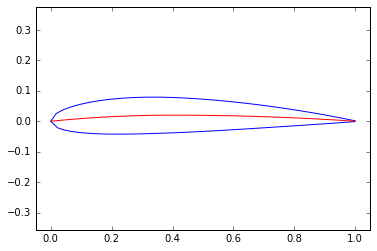

In [49]:
#naca2212
m = 0.02
p = 0.2
t = 0.12
c = 1.0
x = np.linspace(0,1,51)
yc = naca4(x, m, p, t, c=1) 
for item in naca4(x, m, p, t, c):
    pyplot.plot(item[0], item[1], 'b')

pyplot.plot(x, camber_line(x, m, p, c), 'r')
pyplot.axis('equal')
pyplot.xlim((-0.05, 1.05))
print(naca4(x, m, p, t, c))